In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')

In [2]:
rose=pd.read_csv('titanic-training-data.csv')

In [28]:
rose.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [3]:
rose.shape

(891, 12)

In [6]:
rose.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46.00,0,0,PC 17593,79.20,B82 B84,C
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.00,0,0,230434,13.00,NaN,S
342,343,0,2,"Collander, Mr. Erik Gustaf",male,28.00,0,0,248740,13.00,NaN,S
657,658,0,3,"Bourke, Mrs. John (Catherine)",female,32.00,1,1,364849,15.50,NaN,Q
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.75,NaN,S


In [7]:
rose.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
rose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
rose.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
rose.shape

(891, 12)

In [11]:
#rose.drop('Cabin')
rose.drop(['Cabin'], axis=1,inplace=True)

In [12]:
rose.dropna(inplace=True)

In [13]:
rose.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
rose.shape


(712, 11)

In [15]:
#rose.drop([''],axis=1,inplace=True)

In [16]:
rose=pd.get_dummies[rose,columns=["Pclass","SibSp","Parch"]] 

SyntaxError: invalid syntax (911506997.py, line 1)

In [ ]:
# replacing null values in Numerical column using Median
median1=rose["Age"].median()
rose["Age"].replace(np.nan,median1,inplace=True)

# replacing null 

### analyse the data

<AxesSubplot: xlabel='Survived', ylabel='count'>

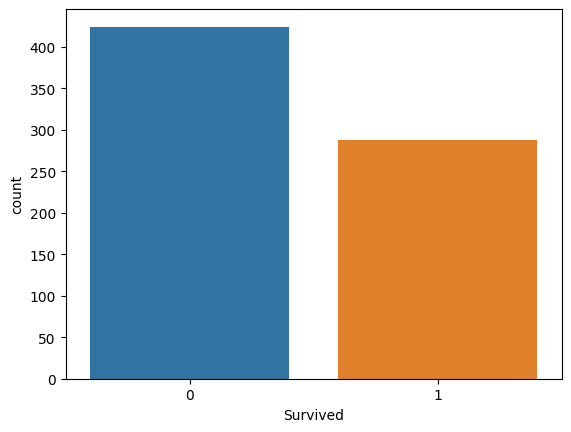

In [17]:
sns.countplot(x="Survived",data=rose)

In [20]:
pd.crosstab(rose["Survived"],rose["Sex"])

Sex,female,male
Survived,,
0,64,360
1,195,93


<AxesSubplot: xlabel='Survived', ylabel='count'>

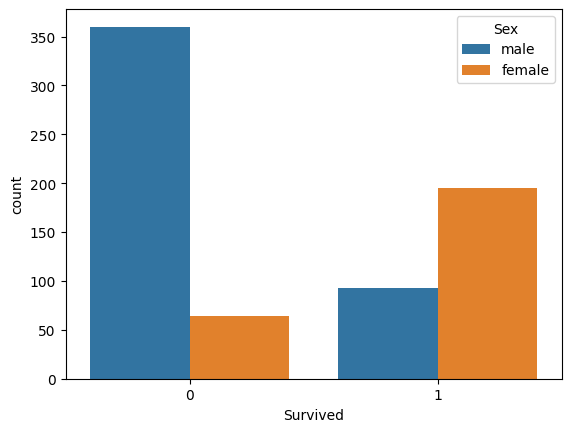

In [21]:
sns.countplot(x="Survived",hue="Sex",data=rose)

<AxesSubplot: xlabel='Survived', ylabel='count'>

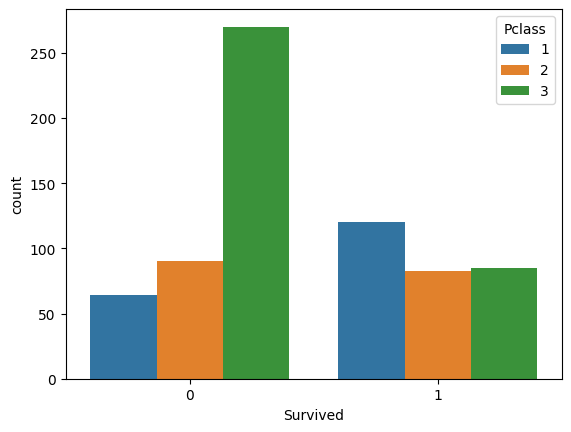

In [22]:
sns.countplot(x="Survived",hue="Pclass",data=rose)

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

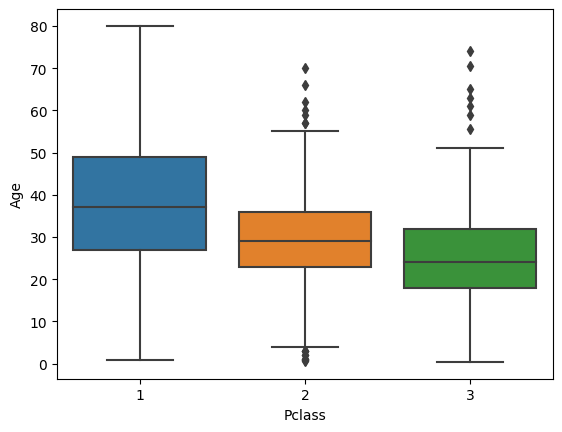

In [23]:
sns.boxplot(x="Pclass",y="Age",data=rose)

In [24]:
rose.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [27]:
#rose.drop("Cabin",axis=1,inplace=True)

In [29]:
rose=rose.drop(["Name","PassengerId","Ticket","Fare"],axis=1)

In [31]:
rose.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Embarked  712 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 44.5+ KB


In [32]:
X=rose.drop("Survived",axis=1)
y=rose["Survived"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split

In [35]:
model.score(X_train,y_train)

NameError: name 'model' is not defined

In [ ]:
model.score(X_train,y_train)

In [ ]:
predictions=model.predidt(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

In [ ]:
from sklearn import matrics

In [ ]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
rose_cm=pd.DataFrame(cm,index=[i for i in["1","0"]])
                    columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(rose_cm,annot=True,fmt='g')

In [ ]:
print(metrics.classification_report)